In [75]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
df = pd.read_csv("C:/Users/ouaga/Dropbox/PythonScripts/Stats_tests/Goats_Weights.csv")

In [77]:
df.head(10)

,Method1,Method2
0,58.88,58.89
1,59.37,63.62
2,59.60,56.83
3,58.54,55.39
4,57.73,58.74
5,59.32,59.07
6,60.18,54.42
7,59.94,61.78
8,59.96,61.29
9,61.09,59.65


### Look at descriptive summary of the data

In [78]:
melted_df = pd.melt(df,var_name="Feed_type", value_name="Weights")

In [79]:
melted_df.head()

,Feed_type,Weights
0,Method1,58.88
1,Method1,59.37
2,Method1,59.60
3,Method1,58.54
4,Method1,57.73


In [80]:
bygroup = melted_df.groupby(['Feed_type'])['Weights']
bygroup.aggregate(['count',np.mean, np.std]).round(2)

,count,mean,std
Feed_type,,,
Method1,25,59.85,2.13
Method2,25,59.09,3.22


## Graphically check the variability using boxplots

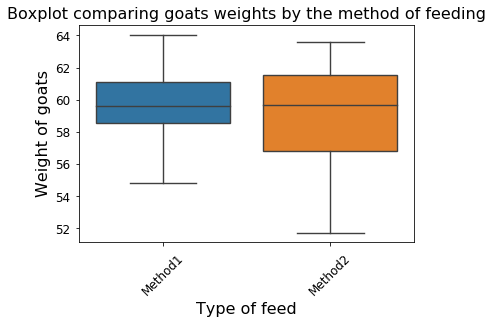

In [81]:
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing goats weights by the method of feeding')
sns.boxplot(x='Feed_type', y='Weights', data=melted_df)
plt.xlabel('Type of feed')
plt.ylabel('Weight of goats')
plt.xticks(rotation=45)
plt.show()

## Testing equality of variances with Levene test

> ### Useage: center:  default: center='median'
> 1. â€˜medianâ€™ : Recommended for skewed (non-normal) distributions>
> 2. â€˜meanâ€™ : Recommended for symmetric, moderate-tailed distributions.
> 3. â€˜trimmedâ€™ : Recommended for heavy-tailed distributions.

In [84]:
(test_statistic, p_value) = stats.levene(df['Method1'],df['Method2'],center='mean')
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  4.22524
The p-value is:  0.04529


### with Scipy 1.00 if missing values are in data they are deleted with nan_policy='omit'  otherwise we receive nan

## Two-tailed test

In [85]:
(test_statistic, p_value) = stats.ttest_ind(df['Method1'],df['Method2'], equal_var =False, nan_policy='omit')
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  0.97658
The p-value is:  0.33441
